### Ejemplo de analisis hecho con información obtenida desde una abse de datos Mysql

In [1]:
import pandas as pd
import MySQLdb
import pandas.io.sql as psql
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (16,13)

In [3]:
db=MySQLdb.connect(host='Aca va el host', user='Aca va el usuario', passwd='Aca va la contraseña', db='Ca va el nombre de la BD')
query = "Aca va la consulta para obtener los datos que se van a usar"
df = psql.read_sql(query, con=db)
db.close()

In [61]:
df.columns

Index(['detSubdeterminante', 'posibles', 'positivas'], dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442698 entries, 0 to 442697
Data columns (total 3 columns):
detSubdeterminante    442698 non-null object
posibles              442698 non-null int64
positivas             442698 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.4+ MB


In [63]:
datos = df.detSubdeterminante.value_counts()

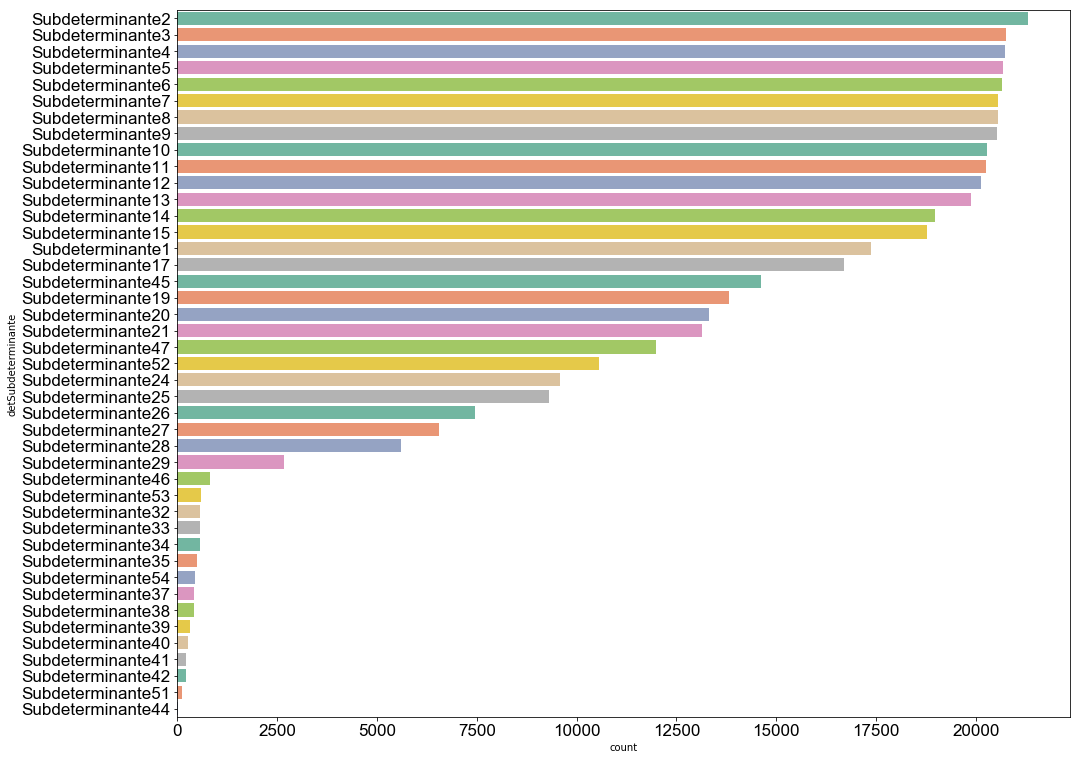

In [69]:
ax = plt.subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(17)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colores = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.countplot(y = 'detSubdeterminante',
              data = df,
              palette= "Set2",
              order = df['detSubdeterminante'].value_counts().index)

### Otro ejemplo obteniendo fechas de nacimiento de hijos por usuario y luego pasandolas a edad

In [70]:
db=MySQLdb.connect(host='Aca va el host', user='Aca va el usuario', passwd='Aca va la contraseña', db='Ca va el nombre de la BD')
query = "Aca va la consulta para obtener los datos que se van a usar"
df2 = psql.read_sql(query, con=db)
db.close()

In [71]:
from datetime import date

In [72]:
hoy = date.today()

In [73]:
edades = []

In [74]:
### Calculo las edades en base a la fecha de naciomiento y las asigno a una nueva columna llamada edad
for i in range (len(df2)):
    edad = hoy.year - df2.fechaNacimientoHijo[i].year - ((hoy.month, hoy.day) < (df2.fechaNacimientoHijo[i].month, df2.fechaNacimientoHijo[i].day))
    edades.append(edad)

In [75]:
df2['edad'] = edades

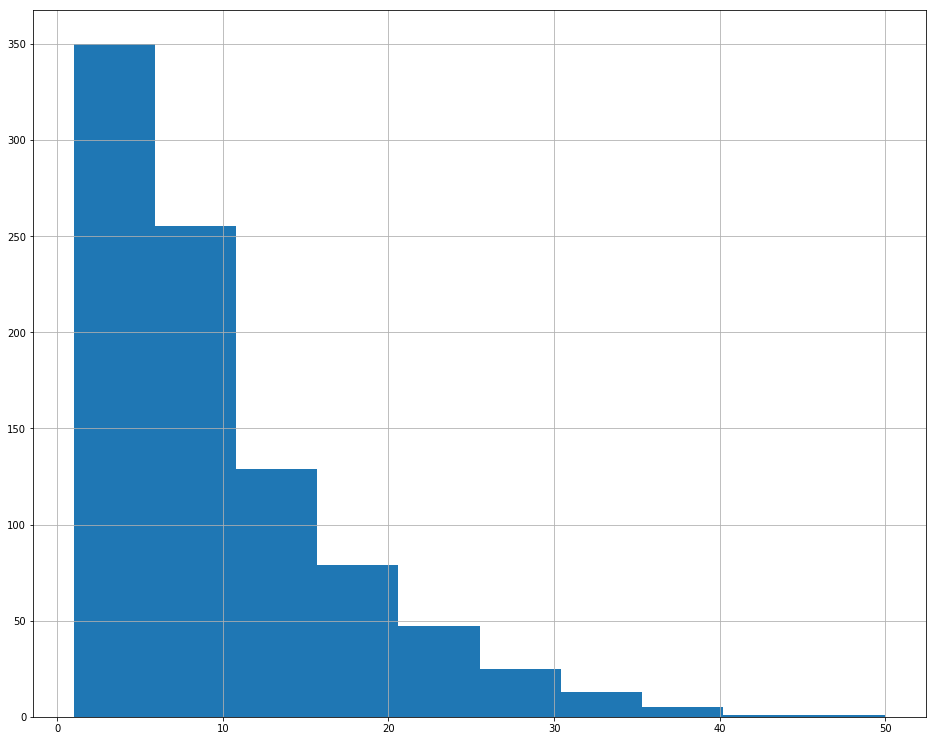

In [76]:
df2.edad[df2.edad > 0].hist()

In [77]:
### Filtro para poder graficar el total de hijos en edad escolar
edad_escolar = df2.edad[df2['edad'].between(4,12)]
edad_escolar = edad_escolar.reset_index()
edad_escolar = edad_escolar.drop(columns = 'index')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C9DF930>]],
      dtype=object)

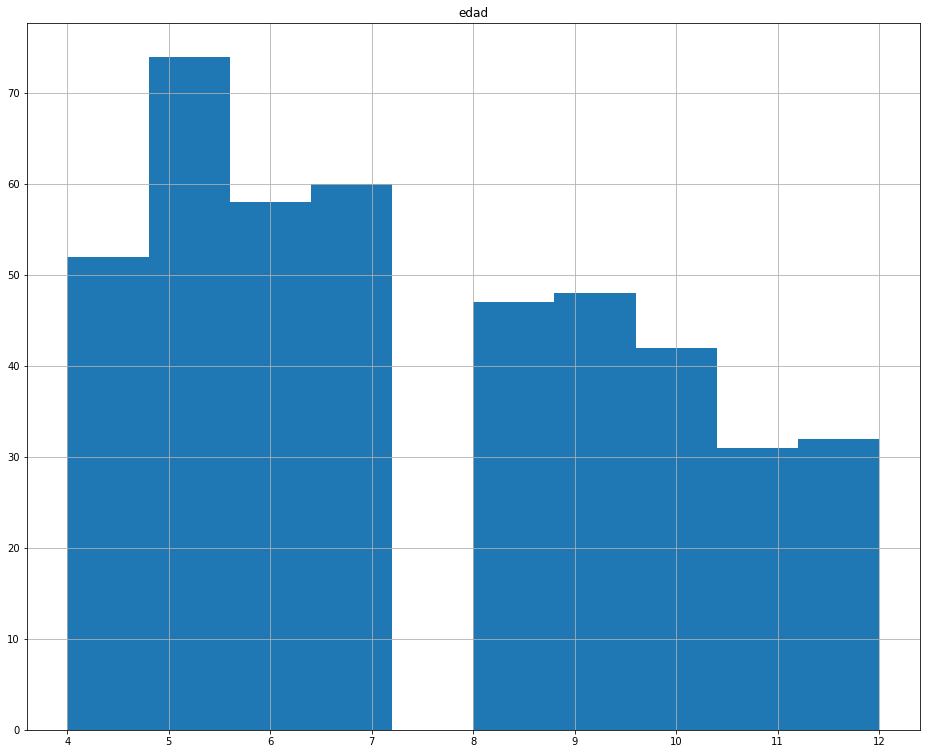

In [78]:
edad_escolar.hist()